# **Análise Exploratória do Dataframe**

Após feita a limpeza inicial, agora iremos explorar o DF afim de encontrar dados que possam ser limpos/corrigidos, e após, nos aprofundar nos dados a serem usados no modelo de precificação.

## **Importação das libs**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

from collections import Counter

In [2]:
df = pd.read_csv('data/df_cleaned.csv')

# **Análise Exploratória Univariada**

In [3]:
df.describe().round(2)

,id,host_id,latitude,longitude,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
count,1.695980e+05,1.695980e+05,169590.00,169590.00,169598.00,169598.00,169309.00,169598.00
mean,6.944896e+16,2.842375e+10,40.73,-73.95,433.06,10.56,15.12,139.15
std,2.336155e+17,3.253658e+10,0.06,0.05,402.52,23.47,66.69,134.54
min,2.595000e+03,1.678000e+03,40.50,-74.25,10.00,1.00,1.00,0.00
25%,1.521547e+07,8.333547e+07,40.69,-73.98,119.00,2.00,1.00,0.00
50%,2.900377e+07,1.286570e+10,40.72,-73.95,294.00,3.00,1.00,91.00
75%,4.420045e+07,5.569013e+10,40.76,-73.93,716.00,12.00,3.00,269.00
max,1.061633e+18,9.876313e+10,40.92,-73.71,20500.00,1250.00,713.00,365.00


Conforme visto no processo de limpeza, todos os dados considerados atípicos foram analisados e removidos. Partindo desse ponto, iremos verificar se há algum dado nulo/vazio no DF que possa ser recuperado mais adiante.

In [4]:
df.isnull().sum()

id                                 0
nome                             230
host_id                            0
host_name                        401
bairro_group                      15
bairro                            11
latitude                           8
longitude                          8
room_type                          0
price                              0
minimo_noites                      0
calculado_host_listings_count    289
disponibilidade_365                0
dtype: int64

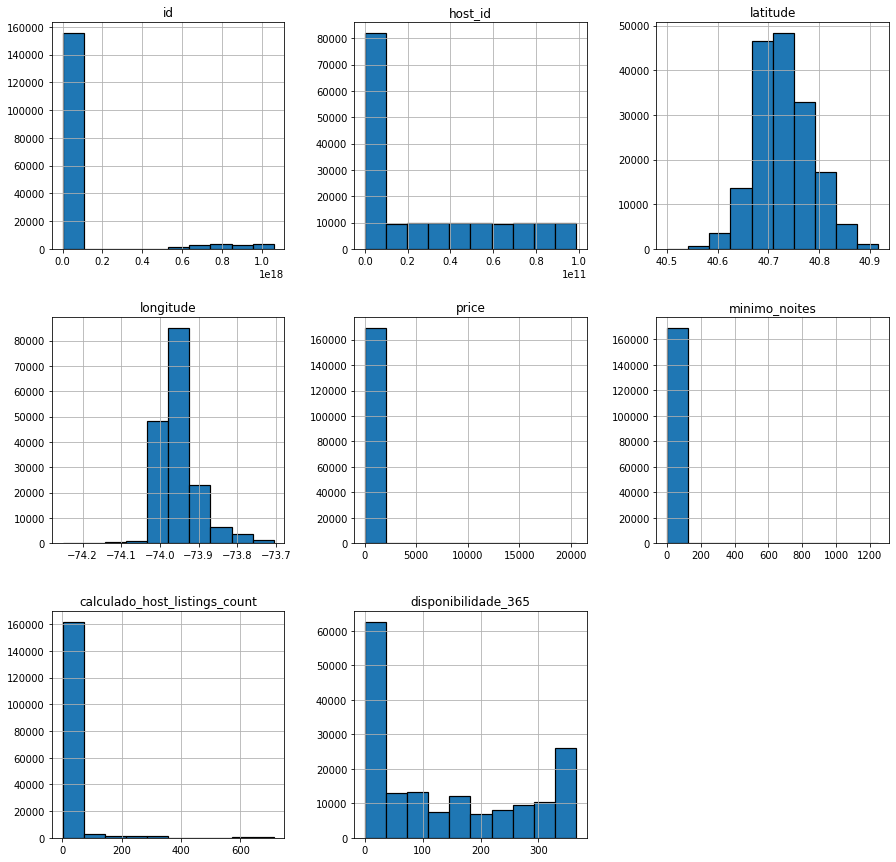

In [5]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(15, 15));

Conforme os histogramas acima, podemos identificar que:
* As coordenadas apresentadas no dataframe estão condizentes com as coordenadas de New York, que são: Latitude: 40.6643, Longitude: -73.9385 (fonte: https://pt.db-city.com/Estados-Unidos--Nova-Iorque--Manhattan--Nova-Iorque)
* Aproximadamente 99,78% dos anúncios são de diárias de até US2.500,00
* Aproximadamente 96,84% dos anúncios são por períodos mínimos de 30 dias, mas apenas 21,92% são por períodos de 1 dia¨
* Dos anúncios, 29,25% não possuem disponibilidade contra 5,36% que possui disponibilidade total, mostrando que se tem uma alta procura pelos imóveis da região, visto que ~63% dos imóveis anunciados possuem uma disponibilidade inferior a 50% da disponibilidade total (183 dias)
* Podemos presumir que a maioria dos imóveis listados são de pessoas físicas proprietárias dos imóveis, visto que ~58,25% dos anúncios são os únicos do anunciante, o que gera uma maior competitividade entre os anúncios, assim como uma possível ineficiência de precificação em imóveis diferenciados ou com valor de venda mais altos

## **Análise exploratória coluna `price`**

In [6]:
df['price'].value_counts()

150.0     2733
100.0     2726
50.0      1958
200.0     1916
60.0      1866
          ... 
5100.0       1
2832.0       1
3800.0       1
2124.0       1
3400.0       1
Name: price, Length: 1389, dtype: int64

In [7]:
df['price'].describe().round(2)

count    169598.00
mean        433.06
std         402.52
min          10.00
25%         119.00
50%         294.00
75%         716.00
max       20500.00
Name: price, dtype: float64

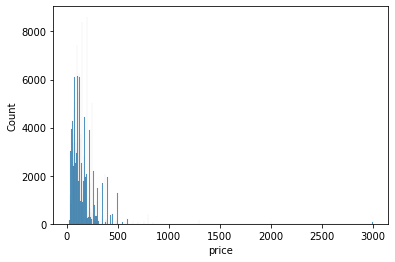

In [8]:
ax = sns.histplot(data=df.loc[df['price']], x='price')

plt.show()

É possível notar que os preços ofertados em suma maioria são de até US500,00 por dia, sendo a média do df de US433,06. Extrapolando esse valor para um aluguel mensal, temos o valor de aluguel de US12.991,80, o qual pode ser considerado alto, visto que o salário mínimo na cidade de New York fica na faixa de US2.640,00 (fonte: https://www.mobills.com.br/blog/direitos/salario-minimo-dos-estados-unidos/), ou seja, aproximadamente 5x o salário base da cidade.

## **Análise da coluna `bairro_group` (Distritos)**

In [9]:
df.loc[df['bairro_group'].isnull()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
71947,1094122,Parlor Room In Victorian Townhouse,45745264571,Heather,NaN,Clinton Hill,40.68843,-73.96408,Private room,925.0,149.0,3.0,311.0
71965,1115110,NaN,87631747854,Amanda,NaN,Prospect Heights,40.67870,-73.97262,Private room,936.0,2.0,3.0,263.0
71991,1134440,ACCOMMODATIONS GALORE #2,81849555528,Richardson,NaN,East Harlem,40.80942,-73.93936,Entire home/apt,252.0,3.0,3.0,109.0
71999,1138859,BROWNSTONE SUNDRENCHED BEAUTY,49595827306,Richardson,NaN,Bushwick,40.68800,-73.91710,Entire home/apt,1028.0,3.0,1.0,150.0
72011,1164265,Cozy Private Room in Apartment,11745797323,Tucker,NaN,Harlem,40.82976,-73.94867,Private room,960.0,30.0,1.0,52.0
72020,1170892,NaN,48659572099,Stewart,NaN,Chinatown,40.71659,-73.98945,Entire home/apt,651.0,25.0,1.0,87.0
72031,1177520,BROOKLYN > Guest Room w/ King Bed in Williamsburg,59305845429,Holmes,NaN,Williamsburg,40.71398,-73.95763,Private room,1080.0,2.0,2.0,361.0
72038,1200716,Bienvenue,92724296556,Richards,NaN,Queens Village,40.72413,-73.76133,Private room,671.0,1.0,1.0,150.0
72056,1213419,Sun-Drenched Hamilton Hts Jewel,618609977,Payne,NaN,Harlem,40.82399,-73.95328,Private room,1083.0,14.0,1.0,61.0
72092,1248766,Hancock Town House!-Stuyvesant Mews,17302896128,Lucia,NaN,Bedford-Stuyvesant,40.68669,-73.91989,Private room,999.0,1.0,4.0,181.0


Como é possível notar, todos os valores nulos na coluna `bairro_group` estão com os valores preenchidos. Para que possamos recuperar esses dados, iremos coletar a latitude e longitude mínima e máxima de cada bairro, assim como os bairros (coluna `bairro`) do dataframe, afim de preencher os dados.

### **Manhattan**

In [10]:
manhattan_geo = df.loc[df['bairro_group'] == 'Manhattan']

In [11]:
bairros_manhattan = df.loc[df['bairro_group'] == 'Manhattan', 'bairro'].unique()

bairros_manhattan_cleaned = bairros_manhattan[:-1]

print(bairros_manhattan_cleaned)

['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"
 'Upper West Side' 'Chinatown' 'West Village' 'Chelsea' 'Inwood'
 'East Village' 'Lower East Side' 'Kips Bay' 'SoHo' 'Upper East Side'
 'Washington Heights' 'Financial District' 'Morningside Heights' 'NoHo'
 'Flatiron District' 'Roosevelt Island' 'Greenwich Village' 'Little Italy'
 'Two Bridges' 'Nolita' 'Gramercy' 'Theater District' 'Tribeca'
 'Battery Park City' 'Civic Center' 'Stuyvesant Town' 'Marble Hill']


In [12]:
latitude_minima_manhattan = manhattan_geo['latitude'].min()
latitude_maxima_manhattan = manhattan_geo['latitude'].max()
longitude_minima_manhattan = manhattan_geo['longitude'].min()
longitude_maxima_manhattan = manhattan_geo['longitude'].max()

print(f'Latitude: mínima - {latitude_minima_manhattan}, máximo - {latitude_maxima_manhattan}. Longitude: mínima - {longitude_minima_manhattan}, máxima - {longitude_maxima_manhattan}.')

Latitude: mínima - 40.70234, máximo - 40.87821. Longitude: mínima - -74.01851, máxima - -73.90855.


### **Brooklyn**

In [13]:
brooklyn_geo = df.loc[df['bairro_group'] == 'Brooklyn']

In [14]:
bairros_brooklyn = df.loc[df['bairro_group'] == 'Brooklyn', 'bairro'].unique()

bairros_brooklyn_cleaned = bairros_brooklyn[:-1]

print(bairros_brooklyn_cleaned)

['Clinton Hill' 'Bedford-Stuyvesant' 'South Slope' 'Williamsburg'
 'Fort Greene' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Greenpoint'
 'Bushwick' 'Flatbush' 'Prospect-Lefferts Gardens' 'Prospect Heights'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Boerum Hill' 'DUMBO' 'East Flatbush' 'Kensington' 'Gravesend'
 'East New York' 'Sheepshead Bay' 'Fort Hamilton' 'Bensonhurst'
 'Sunset Park' 'Brighton Beach' 'Cypress Hills' 'Bay Ridge' 'Columbia St'
 'Vinegar Hill' 'Canarsie' 'Borough Park' 'Downtown Brooklyn' 'Midwood'
 'Red Hook' 'Dyker Heights' 'Sea Gate' 'Navy Yard' 'Brownsville'
 'Manhattan Beach' 'Bergen Beach' 'Coney Island' 'Bath Beach' 'Mill Basin'
 'Gerritsen Beach']


In [15]:
latitude_minima_brooklyn = brooklyn_geo['latitude'].min()
latitude_maxima_brooklyn = brooklyn_geo['latitude'].max()
longitude_minima_brooklyn = brooklyn_geo['longitude'].min()
longitude_maxima_brooklyn = brooklyn_geo['longitude'].max()

print(f'Latitude: mínima - {latitude_minima_brooklyn}, máximo - {latitude_maxima_brooklyn}. Longitude: mínima - {longitude_minima_brooklyn}, máxima - {longitude_maxima_brooklyn}.')

Latitude: mínima - 40.57115, máximo - 40.7389. Longitude: mínima - -74.03969, máxima - -73.85676.


### **Queens**

In [16]:
queens_geo = df.loc[df['bairro_group'] == 'Queens']

In [17]:
bairros_queens = df.loc[df['bairro_group'] == 'Queens', 'bairro'].unique()

print(bairros_queens)

['Long Island City' 'Woodside' 'Flushing' 'Sunnyside' 'Ridgewood'
 'Jamaica' 'Middle Village' 'Ditmars Steinway' 'Astoria' 'Queens Village'
 'Rockaway Beach' 'Forest Hills' 'Elmhurst' 'Jackson Heights' 'St. Albans'
 'Rego Park' 'Briarwood' 'Ozone Park' 'East Elmhurst' 'Arverne'
 'Cambria Heights' 'Bayside' 'Kew Gardens' 'College Point' 'Glendale'
 'Richmond Hill' 'Bellerose' 'Maspeth' 'Woodhaven' 'Kew Gardens Hills'
 'Bay Terrace' 'Whitestone' 'Bayswater' 'Fresh Meadows'
 'Springfield Gardens' 'Howard Beach' 'Belle Harbor' 'Jamaica Estates'
 'Far Rockaway' 'South Ozone Park' 'Corona' 'Neponsit' 'Laurelton'
 'Holliswood' 'Rosedale' 'Edgemere' 'Jamaica Hills' 'Hollis' 'Douglaston'
 'Little Neck' 'Breezy Point' 'Glen Oaks']


In [18]:
latitude_minima_queens = queens_geo['latitude'].min()
latitude_maxima_queens = queens_geo['latitude'].max()
longitude_minima_queens = queens_geo['longitude'].min()
longitude_maxima_queens = queens_geo['longitude'].max()

print(f'Latitude: mínima - {latitude_minima_queens}, máximo - {latitude_maxima_queens}. Longitude: mínima - {longitude_minima_queens}, máxima - {longitude_maxima_queens}.')

Latitude: mínima - 40.56546, máximo - 40.79886. Longitude: mínima - -73.96259181154021, máxima - -73.70522.


### **Staten Island**

In [19]:
staten_island_geo = df.loc[df['bairro_group'] == 'Staten Island']

In [20]:
bairros_staten_island = df.loc[df['bairro_group'] == 'Staten Island', 'bairro'].unique()

print(bairros_staten_island)

['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar'
 'Clifton' 'Graniteville' 'Stapleton' 'New Springville' 'Tottenville'
 'Mariners Harbor' 'Concord' 'Port Richmond' 'Woodrow' 'Eltingville'
 'Lighthouse Hill' 'West Brighton' 'Great Kills' 'Dongan Hills'
 'Castleton Corners' 'Randall Manor' 'Todt Hill' 'Silver Lake'
 'Grymes Hill' 'New Brighton' 'Midland Beach' 'Richmondtown'
 'Howland Hook' 'New Dorp' "Prince's Bay" 'South Beach' 'Oakwood'
 'Huguenot' 'Grant City' 'Westerleigh' 'Bay Terrace, Staten Island'
 'Fort Wadsworth' 'Rosebank' 'Arden Heights' "Bull's Head" 'Rossville'
 'Willowbrook' 'Chelsea']


In [21]:
latitude_minima_staten_island = staten_island_geo['latitude'].min()
latitude_maxima_staten_island = staten_island_geo['latitude'].max()
longitude_minima_staten_island = staten_island_geo['longitude'].min()
longitude_maxima_staten_island = staten_island_geo['longitude'].max()

print(f'Latitude: mínima - {latitude_minima_staten_island}, máximo - {latitude_maxima_staten_island}. Longitude: mínima - {longitude_minima_staten_island}, máxima - {longitude_maxima_staten_island}.')

Latitude: mínima - 40.49979, máximo - 40.64816. Longitude: mínima - -74.251907, máxima - -74.06092.


### **Bronx**

In [22]:
bronx_geo = df.loc[df['bairro_group'] == 'Bronx']

In [23]:
bairros_bronx = df.loc[df['bairro_group'] == 'Bronx', 'bairro'].unique()

print(bairros_bronx)

['Highbridge' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Woodlawn'
 'University Heights' 'Allerton' 'Concourse Village' 'Concourse'
 'Wakefield' 'Spuyten Duyvil' 'Mott Haven' 'Longwood' 'Morris Heights'
 'Port Morris' 'Fieldston' 'Mount Eden' 'City Island' 'Williamsbridge'
 'Soundview' 'Co-op City' 'Parkchester' 'North Riverdale' 'Bronxdale'
 'Riverdale' 'Norwood' 'Claremont Village' 'Fordham' 'Mount Hope'
 'Van Nest' 'Morris Park' 'Tremont' 'East Morrisania' 'Hunts Point'
 'Pelham Bay' 'Throgs Neck' 'West Farms' 'Morrisania' 'Pelham Gardens'
 'Belmont' 'Baychester' 'Melrose' 'Schuylerville' 'Castle Hill'
 'Olinville' 'Edenwald' 'Westchester Square' 'Unionport']


In [24]:
latitude_minima_bronx = bronx_geo['latitude'].min()
latitude_maxima_bronx = bronx_geo['latitude'].max()
longitude_minima_bronx = bronx_geo['longitude'].min()
longitude_maxima_bronx = bronx_geo['longitude'].max()

print(f'Latitude: mínima - {latitude_minima_bronx}, máximo - {latitude_maxima_bronx}. Longitude: mínima - {longitude_minima_bronx}, máxima - {longitude_maxima_bronx}.')

Latitude: mínima - 40.80011, máximo - 40.91697. Longitude: mínima - -73.93296, máxima - -73.78158.


### **Preenchendo a coluna `bairro_group`**

In [25]:
df['bairro_group'] = df['bairro_group'].fillna(0)

In [26]:
def preencher_bairro_group(row):
  if row['bairro_group'] == 0:
    if row['latitude'] >= latitude_minima_manhattan and row['latitude'] <= latitude_maxima_manhattan and row['longitude'] >= longitude_minima_manhattan and row['longitude'] <= longitude_maxima_manhattan:
      return 'Manhattan'
    elif (latitude_minima_brooklyn <= row['latitude'] <= latitude_maxima_brooklyn and longitude_minima_brooklyn <= row['longitude'] <= longitude_maxima_brooklyn):
      return 'Brooklyn'
    elif (latitude_minima_queens <= row['latitude'] <= latitude_maxima_queens and longitude_minima_queens <= row['longitude'] <= longitude_maxima_queens):
      return 'Queens'
    elif (latitude_minima_staten_island <= row['latitude'] <= latitude_maxima_staten_island and longitude_minima_staten_island <= row['longitude'] <= longitude_maxima_staten_island):
      return 'Staten Island'
    elif (latitude_minima_bronx <= row['latitude'] <= latitude_maxima_bronx and longitude_minima_bronx <= row['longitude'] <= longitude_maxima_bronx):
      return 'Bronx'
    else:
      return 0
  return row['bairro_group']

In [27]:
# Executa função preencher_bairro_group
df['bairro_group'] = df.apply(preencher_bairro_group, axis=1)

## **Analisando a coluna `bairro_group`**

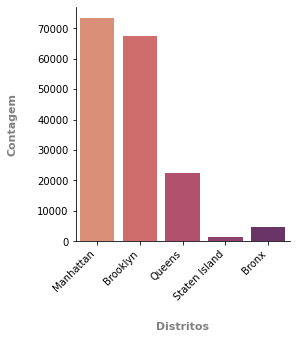

In [28]:
sns.catplot(x="bairro_group", data=df, kind="count", height=4, palette='flare', legend=False, hue='bairro_group')

plt.xlabel('Distritos', color='grey', labelpad=20, fontweight='bold', fontsize=11)
plt.ylabel('Contagem', color='grey', labelpad=20, fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')

plt.show()

In [29]:
df['bairro_group'].value_counts()

Manhattan        73362
Brooklyn         67566
Queens           22393
Bronx             4711
Staten Island     1566
Name: bairro_group, dtype: int64

Conforme podemos analisar, os distritos que mais possuem anúncios são:
* Manhattan, com ~ 43% dos anúncios;
* Brooklyn, com ~ 40% dos anúncios;

E os distritos com menos anúncios são:
* Staten Island, com ~ 1% dos anúncios;
* Bronx, com ~ 3% dos anúncios;

Mais adiante, iremos analisar os valores médios de aluguel de cada distrito, afim de analisar se os distritos que possuem menos anúncios possuem um ticket médio superior a Manhattan e Brooklyn, e como se comporta os aluguéis do Queens, que possui um valor de anúncios intermediários aos 4 distritos.

## **Análise da coluna `bairro`**

In [30]:
df.isnull().sum()

id                                 0
nome                             230
host_id                            0
host_name                        401
bairro_group                       0
bairro                            11
latitude                           8
longitude                          8
room_type                          0
price                              0
minimo_noites                      0
calculado_host_listings_count    289
disponibilidade_365                0
dtype: int64

In [31]:
df.loc[df['bairro'].isnull()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
72156,1303444,STYLISH EAST VILLAGE FLAT,6825076306,Arnold,Manhattan,NaN,40.73089,-73.98195,Entire home/apt,749.0,30.0,1.0,67.0
72173,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,Arthur,Manhattan,NaN,40.79816,-73.96190,Entire home/apt,892.0,2.0,3.0,4.0
72193,1339896,Wonderfully inviting East Village,84560895335,Carter,Manhattan,NaN,40.72709,-73.98274,Private room,486.0,1.0,1.0,116.0
72201,1345971,Stylish Studio with exclusive Terrace,21547822804,Cole,Manhattan,NaN,40.75348,-73.97065,Entire home/apt,417.0,30.0,1.0,272.0
72207,1350942,Lower East Side/Chinatown 1 Bedroom,58408401042,Higgins,Manhattan,NaN,40.71693,-73.98948,Entire home/apt,1148.0,5.0,1.0,42.0
72245,1375795,Loft Suite @ The Box House Hotel,34416621424,Smith,Brooklyn,NaN,40.73693,-73.95316,Entire home/apt,914.0,3.0,28.0,296.0
72248,1377452,Loft w/ Terrace @ Box House Hotel,77372797211,Higgins,Brooklyn,NaN,40.73783,-73.95259,Private room,528.0,3.0,28.0,216.0
72270,1402306,Studio sublet in Hell's kitchen,42150054304,Baker,Manhattan,NaN,40.76217,-73.98411,Entire home/apt,831.0,5.0,1.0,322.0
72274,1405067,One bed suite with private garden,464927437,Myers,Manhattan,NaN,40.78304,-73.97447,Entire home/apt,624.0,30.0,5.0,24.0
72298,1421084,Spacious room on charming block in Greenpoint!,67988523719,Williams,Brooklyn,NaN,40.72723,-73.95728,Private room,745.0,4.0,1.0,20.0


Conforme visto acima, é possível verificar que apesar dos bairros constarem como nulos no DF, os dados de latitude e longitude estão preenchidos, e com isso, é possível encontrar os bairros pertencetes utilizando a mesma técnica vista acima, de utilizar a menor e maior latitude de cada bairro do DF como parâmetro, contudo, pela quantidade de bairros que cada Distrito possui, essa aplicação não será executada nesse projeto, devido ao tempo do desafio, mas é um ponto de melhoria do projeto.

### **Analisando a coluna `bairro`**

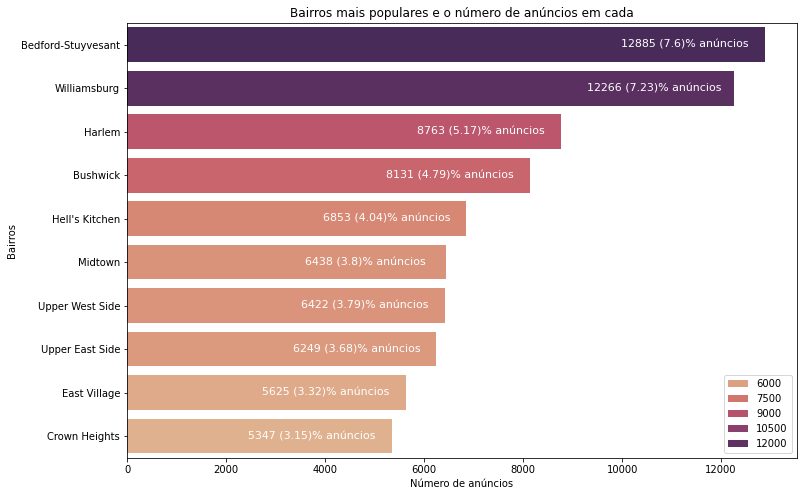

In [32]:
data = df['bairro'].value_counts()[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=data.values, y=data.index, palette='flare', hue=data.values)

for i, count in enumerate(data.values):
    ax.annotate(f'{count} ({((count/169598)*100).round(2)})% anúncios', (count, i), ha='center', va='center',
                fontsize=11, color='white', xytext=(-80, 0), textcoords='offset points')

plt.title('Bairros mais populares e o número de anúncios em cada')
plt.xlabel('Número de anúncios')
plt.ylabel('Bairros')
plt.show()


Conforme o gráfico acima, é possível verificar que os 10 bairros mais populares em anúncios são todos localizados nos distritos de Brooklyn e Manhattan, sendo:

* 48,91% dos anúncios (22,80% do total) no distrito de Brooklyn;
* 51,09% dos anúncios (23,80% do total) no distrito de Manhattan;

Com isso, podemos verificar que apesar do distrito de Manhattan ter mais anúncios nos 10 bairros mais anunciados, assim como no compilado de anúncios da nossa amostra (vide *Analisando a coluna bairro_group*), os dois bairros mais populares (Bedford-Stuyvesant e Williamsburg) são do distrito do Brooklyn. Uma análise mais aprofundada será feita, para ver como esses dois bairros se comparam no preço médio do distrito do Brooklyn.

## **Análise das colunas `latitude` e `longitude`**


In [33]:
df.loc[df['latitude'].isnull()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
72315,1431578,"Large, furnished room in a 2 bedroom!",20368956893,Gibson,Brooklyn,Crown Heights,NaN,NaN,Private room,539.0,1.0,1.0,41.0
72319,1434892,Authentic NY Charming Artist Loft,66486085219,Bailey,Brooklyn,Greenpoint,NaN,NaN,Entire home/apt,1058.0,5.0,1.0,226.0
72329,1442624,Huge room with private balcony,69386945815,Hunt,Manhattan,East Village,NaN,NaN,Private room,506.0,6.0,1.0,240.0
72342,1450908,Decorators 5-Star Flat West Village,33280739304,Watson,Manhattan,West Village,NaN,NaN,Entire home/apt,381.0,20.0,1.0,61.0
72365,1466925,Nice Private Room Beauty in Queens,15305733205,Roberts,Queens,Elmhurst,NaN,NaN,Private room,224.0,1.0,2.0,70.0
72403,1490122,Cute Room in Historic Loft!,42267829819,Jones,Brooklyn,Greenpoint,NaN,NaN,Private room,524.0,14.0,1.0,266.0
72440,1512766,21 day Chelsea Apartment rental,10876728736,Owens,Manhattan,Flatiron District,NaN,NaN,Private room,623.0,21.0,1.0,104.0
72494,1545904,New York City for All Seasons!,26437872336,Douglas,Manhattan,Upper West Side,NaN,NaN,Private room,413.0,1.0,1.0,259.0


Em todo DF, temos 8 linhas em que a coluna `latitude` e `longitude` estão nulas, mas como temos a coluna `bairro` preenchida, esses dados podem ser desconsiderados, e com isso, iremos manter os dados no DF.

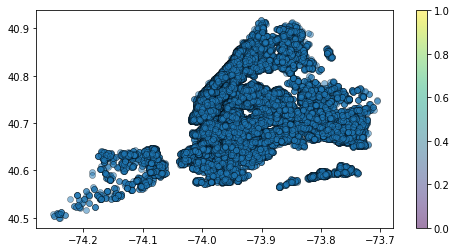

In [34]:
plt.figure(figsize=(8, 4))
plt.scatter(df['longitude'], df['latitude'], edgecolor='black', linewidth=0.5, alpha=0.5)

cbar = plt.colorbar()

Conforme o gráfico acima, é possível verificar que as coordenadas são condizentes com a cidade de New York, assim como a densidade de anúncios.

fonte: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City



## **Análise da coluna `room_type`**

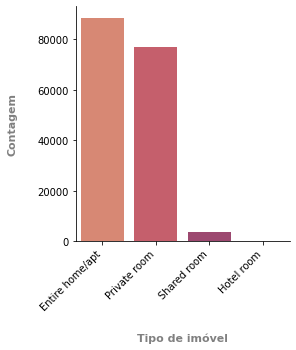

In [35]:
sns.catplot(x="room_type", data=df, kind="count", height=4, palette='flare', legend=False, hue='room_type')

plt.xlabel('Tipo de imóvel', color='grey', labelpad=20, fontweight='bold', fontsize=11)
plt.ylabel('Contagem', color='grey', labelpad=20, fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')

plt.show()

In [36]:
df['room_type'].value_counts()

Entire home/apt    88611
Private room       77168
Shared room         3613
Hotel room           206
Name: room_type, dtype: int64

É possível notar que quase a totalidade dos anúncios são feitos nas modalidades 'Entire home/apt' e 'Private room', sendo:
* 52,25% na modalidade 'Entire home/apt';
* 45,50% na modalidade 'Private room';

Mais adiante, será analisado como o preço de locação é influenciado pela modalidade `room_type`.

# **Análise Exploratória Bivariada**

In [37]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.xticks(rotation=45, ha='right')


TypeError: DataFrame.corr() got an unexpected keyword argument 'numeric_only'

<Figure size 720x720 with 0 Axes>

Pelo heatmap, podemos aferir algumas correlações entre as seguintes variáveis:

* `Price` e `host_id`, ou seja, usuários tendem a anunciar imóveis de valores similares, e conforme podemos ver na etapa Análise da coluna `price`, no notebook 1 - Limpeza, podemos denotar que essa correlação pode ser dada, entre outros, pra indivíduos ou companhias que compram andares (ou prédios inteiros) para renda, e com isso, os valores são padronizados.
* `Price` e `minimo_noites` possuem uma correlação negativa, ou seja, conforme uma variável aumenta, a outra tem tendência a diminuir. Por exemplo: conforme o proprietário aumenta o tempo mínimo de locação, para que ele consiga gerar interesse no imóvel, o preço da diária deve reduzir. Imóveis com tempo de permanência maior possuem menor flexibilidade, e com isso, essa correlação se apresenta condizente, visto que um usuário tem maiores chances de encontrar menores valores de aluguel em imóveis com maior flexibilidade de locação mínima, visto a oferta da região;
* `Price` e `calculado_host_listings_count`	possuem correlação negativa, ou seja, conforme o usuário possui mais imóveis para locação, menor é o preço anunciado dos imóveis. Essa correlação negativa pode ter relação com os seguintes fatores: usuários pessoa física (PF) podem ter grande parte ou a totalidade da sua renda auferida pelo ganho dos aluguéis, e com isso, com um preço menor, ele possui maiores chances de ter o imóvel locado por mais tempo, e no caso de empresas que utilizam a plataforma, se forem imobiliárias anunciando para clientes, o menor preço garante que as chances de remuneração sejam maiores, visto que elas recebem parte dos ganhos. Em casos de empresas que possuem imóveis e tem a plataforma como meio de anúncio, pode-se aplicar a mesma estratégia que para indivíduos PF, visto que a empresa tem custos na aquisição e manutenção dos imóveis, e a maior vacância no imóvel gera um passivo maior ao longo do tempo para a companhia;

In [ ]:
# Relação entre listagens de mesmo valor agrupado por host_id
announcement_price = df.groupby(['host_id'])['price'].value_counts()
filtered_announcement_price = announcement_price[announcement_price.index.get_level_values(0) > 1].sort_values(ascending=False)

filtered_announcement_price.head(10)

host_id    price
3223938    43.0     58
           41.0     50
30283594   239.0    48
3223938    39.0     42
           42.0     40
51501835   100.0    37
3223938    44.0     36
           40.0     35
204704622  30.0     34
19303369   33.0     34
Name: price, dtype: int64

## **Preço médio por tipo de quarto e distrito (`price x room_type x bairro_group`)**


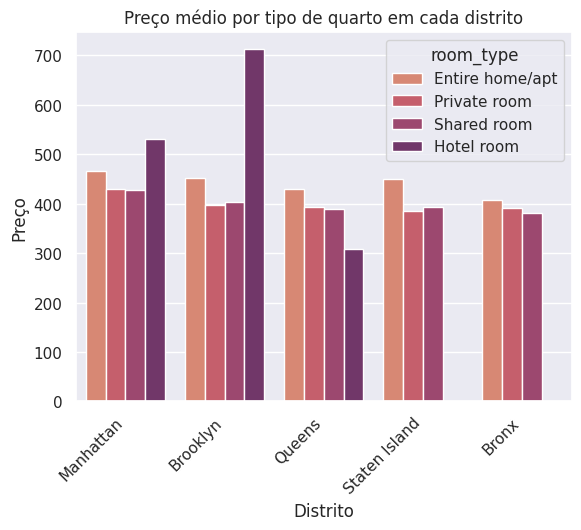

In [ ]:
ax = sns.barplot(x='bairro_group', y='price', data=df, errorbar=None, palette='flare', hue='room_type', legend=True)

for i, room_type in enumerate(df['room_type'].unique()):
    mean_price = df.loc[df['bairro_group'] == room_type, 'price'].mean()
    ax.annotate(f'${mean_price:.2f}', (i, mean_price),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Distrito')
plt.ylabel('Preço')
plt.title('Preço médio por tipo de quarto em cada distrito')

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
mean_price_by_bairro = df.groupby(['bairro_group', 'room_type'])['price'].mean().sort_values(ascending=False)

mean_price_by_bairro.head(20)

bairro_group   room_type      
Brooklyn       Hotel room         711.714286
Manhattan      Hotel room         531.673913
               Entire home/apt    465.477241
Brooklyn       Entire home/apt    452.516219
Staten Island  Entire home/apt    449.077905
Queens         Entire home/apt    430.009869
Manhattan      Private room       429.168785
               Shared room        428.080169
Bronx          Entire home/apt    407.607043
Brooklyn       Shared room        402.444278
               Private room       397.579356
Queens         Private room       394.090909
Staten Island  Shared room        393.322581
Bronx          Private room       390.629304
Queens         Shared room        389.153724
Staten Island  Private room       384.690160
Bronx          Shared room        381.375000
Queens         Hotel room         308.400000
Name: price, dtype: float64

Pelo gráfico acima, podemos verificar que:

* Os anúncios de quarto de hotel são mais altos que as outras categorias em Manhattan e Brooklyn, e aproximadamente 25% mais barato no Queens;
* Private room e shared room possuem praticamente o mesmo valor em cada distrito;
* Entire home/apt possui os preços mais altos em todos os distritos, sendo que no Bronx possui a menor diferença de preço entre private room e shared room, e nquanto que os distritos de Manhattan e Brooklyn possuem as maiores diferenças de preço.

## **Preço médio por bairro (`price x bairro`)**


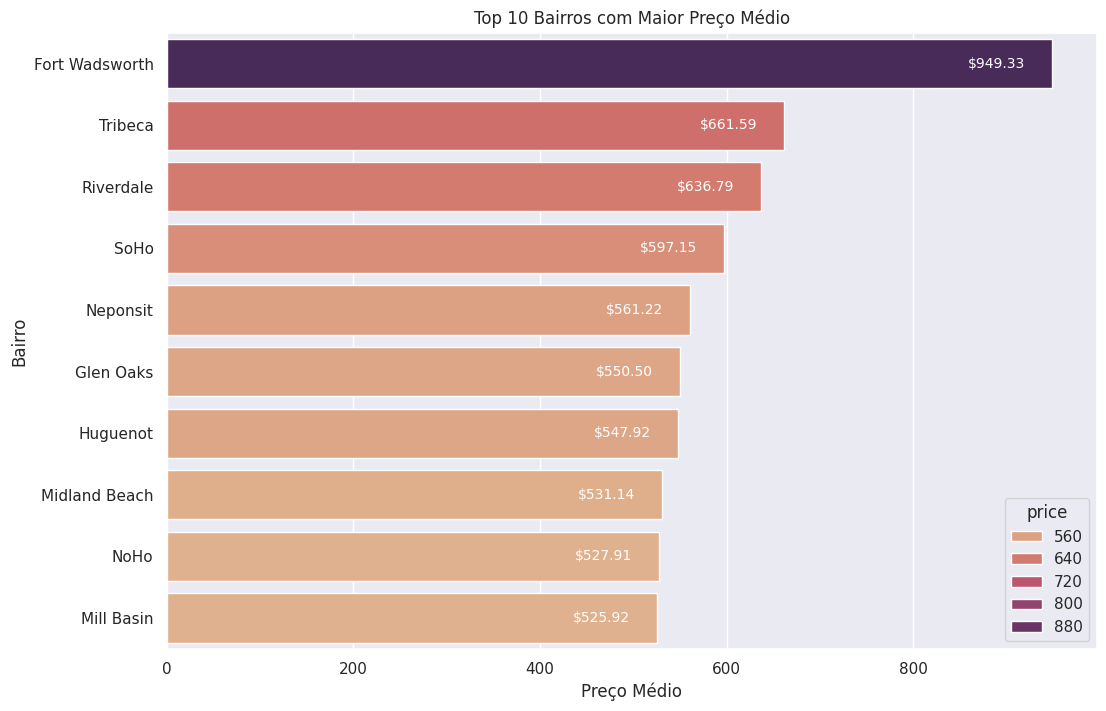

In [ ]:
data_bairros = df['bairro'].value_counts()

media_preco_bairro = df.groupby('bairro')['price'].mean().loc[data_bairros.index]

media_preco_bairro_sorted = media_preco_bairro.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=media_preco_bairro_sorted.values, y=media_preco_bairro_sorted.index, palette='flare', hue=media_preco_bairro_sorted)

for i, price in enumerate(media_preco_bairro_sorted.values):
    ax.annotate(f'${price:.2f}', (price, i), ha='center', va='center',
                fontsize=10, color='white', xytext=(-40, 0), textcoords='offset points')

plt.title('Top 10 Bairros com Maior Preço Médio')
plt.xlabel('Preço Médio')
plt.ylabel('Bairro')
plt.show()


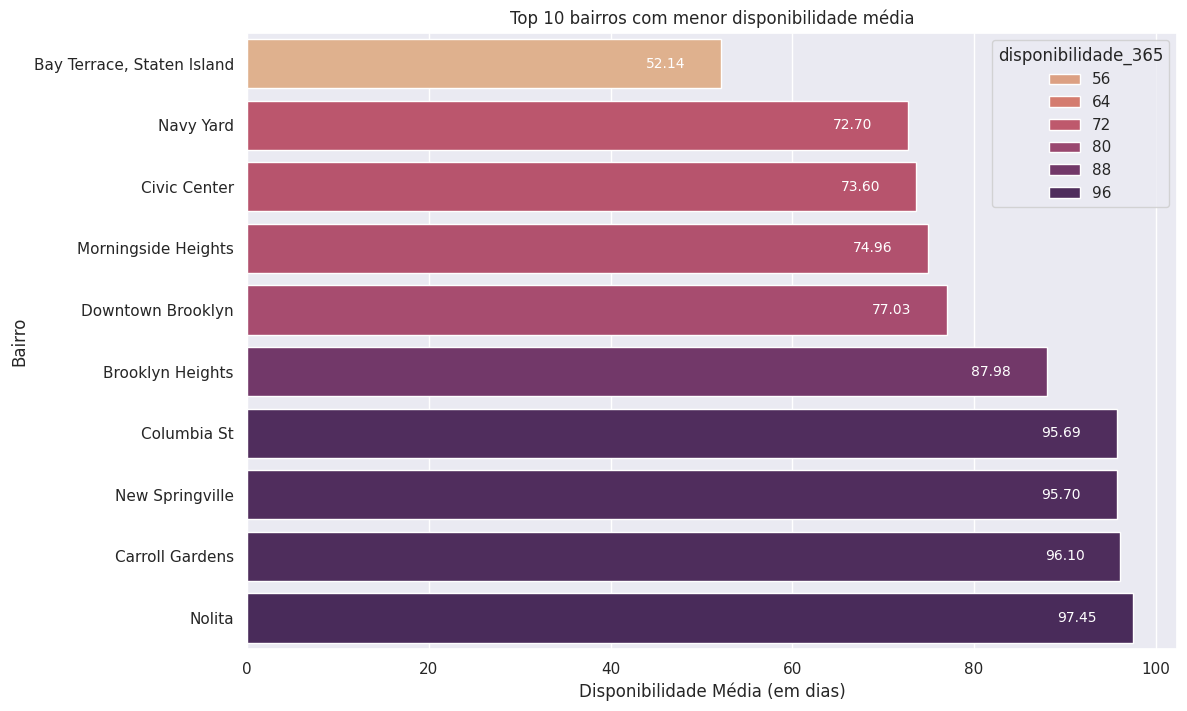

In [ ]:
data_bairros = df['bairro'].value_counts()

disponibilidade_365_bairro = df.groupby('bairro')['disponibilidade_365'].mean().loc[data_bairros.index]
disponibilidade_365_bairro_sorted = disponibilidade_365_bairro.sort_values(ascending=True)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=disponibilidade_365_bairro_sorted.values, y=disponibilidade_365_bairro_sorted.index, palette='flare', hue=disponibilidade_365_bairro_sorted)

for i, bairro in enumerate(disponibilidade_365_bairro_sorted.index):
    mean_disponibilidade_365 = disponibilidade_365_bairro_sorted[bairro]
    ax.annotate(f'{mean_disponibilidade_365:.2f}', (mean_disponibilidade_365, i), ha='center', va='center',
                fontsize=10, color='white', xytext=(-40, 0), textcoords='offset points')

plt.title('Top 10 bairros com menor disponibilidade média')
plt.xlabel('Disponibilidade Média (em dias)')
plt.ylabel('Bairro')
plt.show()


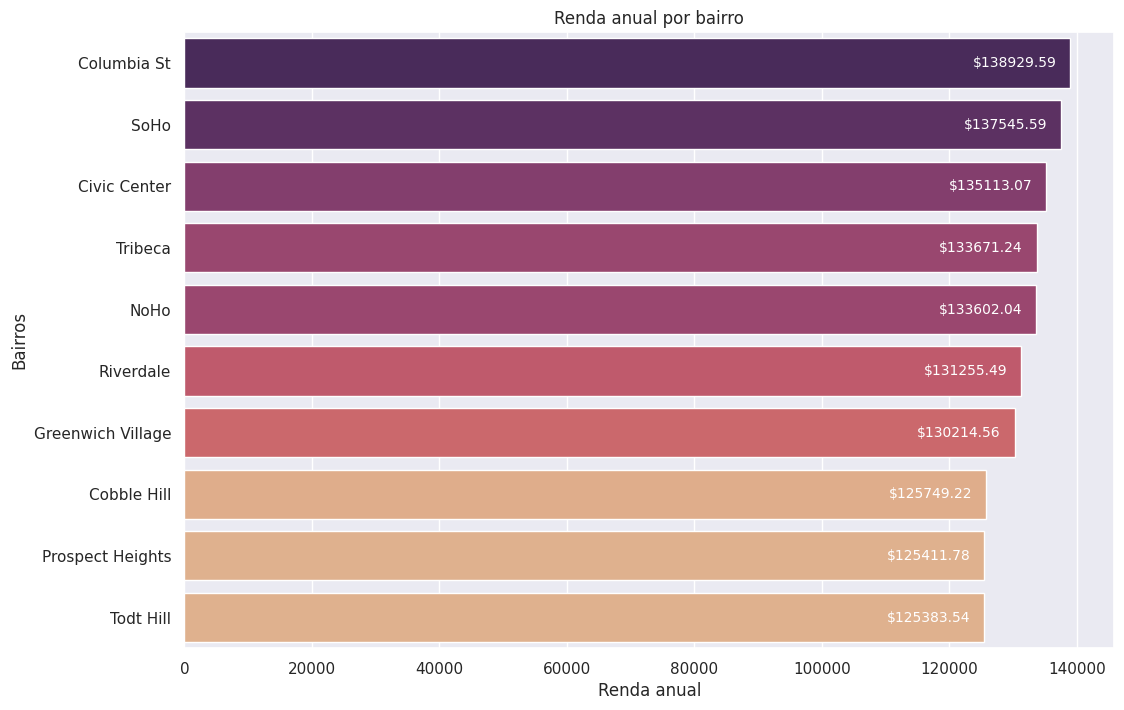

In [ ]:
data_bairros = df[df['room_type'] != 'Hotel room']

disponibilidade_365_bairro = data_bairros.groupby('bairro')['disponibilidade_365'].mean()
ocupacao_bairro = 365 - disponibilidade_365_bairro
preco_medio_bairro = data_bairros.groupby('bairro')['price'].mean()

renda_anual_bairro = preco_medio_bairro * ocupacao_bairro
renda_anual_bairro_top = renda_anual_bairro.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=renda_anual_bairro_top.values, y=renda_anual_bairro_top.index, palette='flare', hue=renda_anual_bairro_top, legend=False)

for i, bairro in enumerate(renda_anual_bairro_top.index):
    renda_anual = renda_anual_bairro_top[bairro]
    ax.annotate(f'${renda_anual:.2f}', (renda_anual, i), ha='center', va='center',
                fontsize=10, color='white', xytext=(-40, 0), textcoords='offset points')

plt.title('Renda anual por bairro')
plt.xlabel('Renda anual')
plt.ylabel('Bairros')
plt.show()


Conforme os gráficos Renda anual, Top 10 bairros com preço médio mais alto e Renda anual por bairro, podemos concluir que o ticket médio mais alto tem influência na ocupação dos imóveis, visto que nenhum dos 10 imóveis com ticket médio mais alto está na lista de ocupação mais elevada. Entretanto, apesar da ocupação não estar entre os 10 bairros com melhor performance, alguns bairros com ticket mais alto configuram entre os mais rentáveis de New York, ou seja, mesmo com uma ocupação mais baixa, o ticket mais elevado tem um retorno atrativo para o locatário.

# **Análise de viabilidade econômica do bairro Columbia St**

Conforme apresentado acima, o bairro de Columbia St possui o maior ticket médio anual, ou seja, apesar da disponibilidade de quase 100 dias por ano, o ticket médio mais alto compensa esse fator. Com isso, iremos analisar mais a fundo o tipo de aluguel que possui maior ticket médio e o que possui menor vacância.

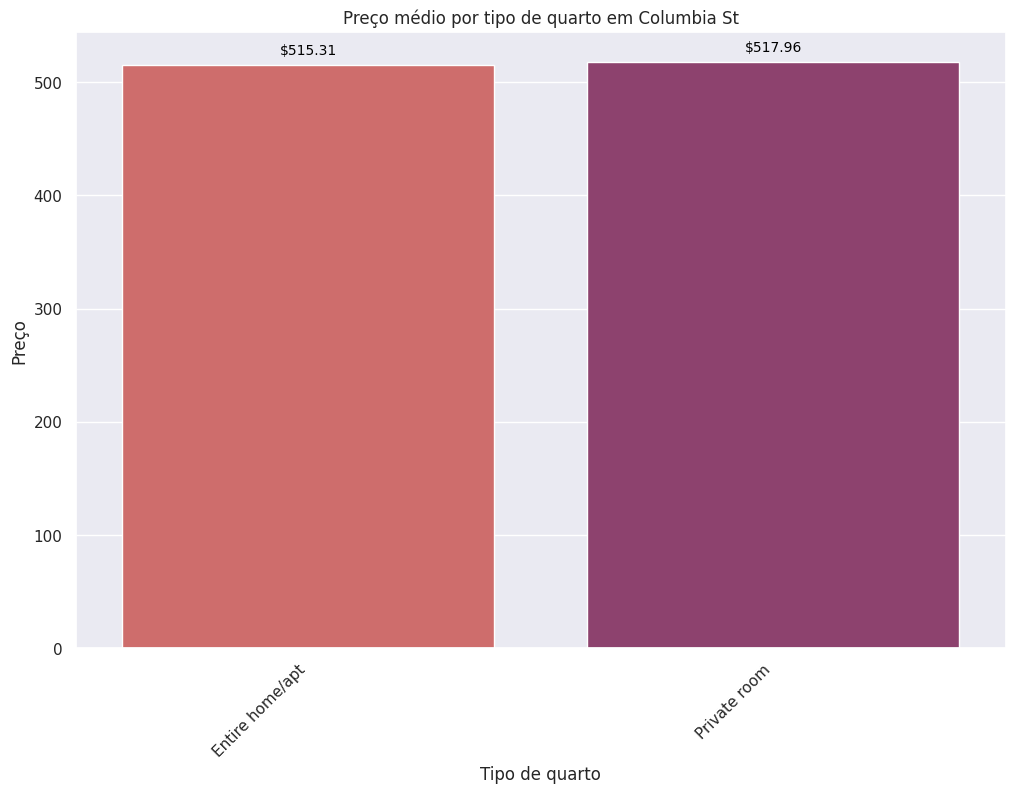

In [ ]:
bairro_columbia = df[df['bairro'] == 'Columbia St']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='room_type', y='price', data=bairro_columbia, errorbar=None, palette='flare', hue='room_type')

for i, room_type in enumerate(bairro_columbia['room_type'].unique()):
    mean_price = bairro_columbia.loc[bairro_columbia['room_type'] == room_type, 'price'].mean()
    ax.annotate(f'${mean_price:.2f}', (i, mean_price),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Tipo de quarto')
plt.ylabel('Preço')
plt.title('Preço médio por tipo de quarto em Columbia St')
plt.xticks(rotation=45, ha='right')

plt.show()

Private room é o tipo de aluguel que possui o ticket médio mais alto, ficando acima até de locação de apartamento/casa inteiro, mas a diferença é baixa, sendo assim, vamos analisar a ocupação média.

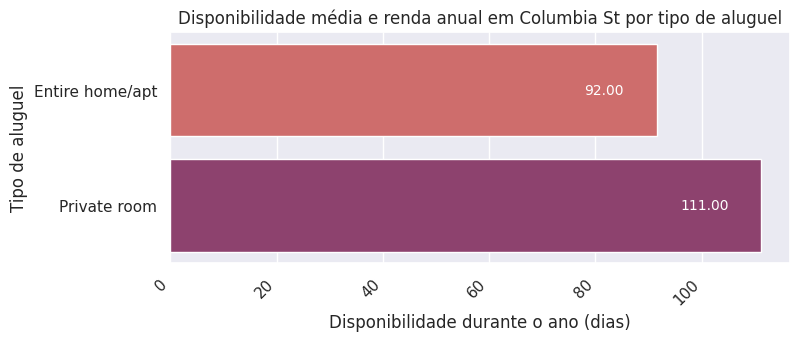

In [ ]:
bairro_columbia = df[df['bairro'] == 'Columbia St']
bairro_columbia_cleaned = bairro_columbia[bairro_columbia['room_type'] != 'Hotel room']

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='disponibilidade_365', y='room_type', data=bairro_columbia_cleaned, estimator=np.mean, errorbar=None, palette='flare', hue='room_type')

for i, room_type in enumerate(bairro_columbia_cleaned['room_type'].unique()):
    disponibilidade_media = bairro_columbia_cleaned.loc[bairro_columbia_cleaned['room_type'] == room_type, 'disponibilidade_365'].mean()
    ax.annotate(f'{disponibilidade_media.round():.2f}', (disponibilidade_media.round(), i), ha='center',
                va='center', fontsize=10, color='white', xytext=(-40, 0), textcoords='offset points')

plt.xlabel('Disponibilidade durante o ano (dias)')
plt.ylabel('Tipo de aluguel')
plt.title('Disponibilidade média e renda anual em Columbia St por tipo de aluguel')
plt.xticks(rotation=45, ha='right')

plt.show()

# **Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

Com isso, podemos concluir que o bairro mais indicado para compra é:

* Columbia St por possir a melhor geração de renda entre os bairros, seguido por SoHo e Civic Center;
* O mesmo possui uma baixa vacância média, tendo uma ocupação média de 273 dias (75% do ano) na modalidade Entire home/apt e ocupação média de 254 dias (70%) na modalidadde Private room;
* Com isso, a melhor escolha de investimento para locação na cidade de New York é o bairro de Columbia St, sendo vantajoso a opção de um apartamento/casa com 2 quartos, sendo possível assim, fazer a locação por shared room, e ter dessa forma, a opção de dividir o espaço com um inquilino ou alugar os dois ambientes na plataforma

# **Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

In [ ]:
nomes = df['nome'].astype(str)

nomes_limpos = nomes.str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower().str.split()

contagem_palavras = Counter(word for lista in nomes_limpos for word in lista)

palavras_chave = {palavra: frequencia for palavra, frequencia in contagem_palavras.items() if frequencia > 3}

top_palavras_chave = sorted(palavras_chave.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_palavras_chave)

[('in', 73033), ('bedroom', 39080), ('room', 30612), ('private', 23993), ('apartment', 21020), ('bath', 20740), ('brooklyn', 19868), ('bed', 19339), ('new', 16761), ('rental', 15315)]


In [ ]:
df.loc[df['price'] > 5000]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365
3536,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.777820,-73.978480,Entire home/apt,6000.0,14.0,1.0,359.0
3719,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.718950,-73.997930,Entire home/apt,5250.0,1.0,1.0,0.0
3773,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.687660,-73.964390,Entire home/apt,6500.0,1.0,1.0,0.0
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.691370,-73.967230,Entire home/apt,8000.0,1.0,11.0,365.0
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.792640,-73.938980,Entire home/apt,9999.0,5.0,1.0,0.0
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.768100,-73.916510,Private room,10000.0,100.0,1.0,0.0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.713550,-73.985070,Private room,9999.0,99.0,1.0,83.0
15559,12520066,Luxury townhouse Greenwich Village,66240032,Linda,Manhattan,Greenwich Village,40.730460,-73.995620,Entire home/apt,6000.0,1.0,1.0,0.0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.732600,-73.957390,Entire home/apt,10000.0,5.0,1.0,0.0
29226,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.772130,-73.986650,Entire home/apt,10000.0,30.0,1.0,83.0


Sim, é possível notar que existe um padrão, sendo ele:
* Tipo de imóvel (condominio, apartamento, quarto, etc);
* Seguido da localização (distrito ou mesmo a cidade);
* Descrição da quantidade de comôdos da casa, sendo: quartos, banheiro e quantidade de camas disponíveis;

# **Output**

In [38]:
output_file = "data/df_final.csv"

df.to_csv(output_file, index=False)